In [4]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import cmocean.cm as cmo
#import holoviews as hv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [79]:
def colorea (plot, axis, units):
    cb = plt.colorbar(plot, ax=axis)
    cb.ax.tick_params(labelsize=20)
    cb.set_label(units, fontsize=20)

In [108]:
def diferencia1D(data, mapa, limite, units):
    plt.figure(figsize=(30,45))
    ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
    plot1 = ax1.contourf(dsm.xt_ocean, dso.yt_ocean, data[1], 40, cmap=mapa)
    colorea(plot1, ax1, units)
    plt.title('1900', fontsize=40)

    ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
    plot2 = ax2.contourf(dsm.xt_ocean, dso.yt_ocean, data[-1], 40, cmap=mapa)
    colorea(plot2, ax2, units)
    plt.title('2054', fontsize=40)

    ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
    plot3 = ax3.contourf(dsm.xt_ocean, dso.yt_ocean, data[-1] - data[1], 40, cmap="RdYlBu_r",
                        vmin=limite, vmax=abs(limite))
    colorea(plot3, ax3, units)
    plt.title('Differences', fontsize=40)

    plt.show()

In [114]:
def diferencia2D(data, mapa, limite, units):
    plt.figure(figsize=(30,45))
    ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
    plot1 = ax1.contourf(dso.xt_ocean, dso.yt_ocean, data[1, 1], 40, cmap=mapa)
    colorea(plot1, ax1, units)
    plt.title('1900', fontsize=40)

    ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
    plot2 = ax2.contourf(dso.xt_ocean, dso.yt_ocean, data[-1, 1], 40, cmap=mapa)
    colorea(plot2, ax2, units)
    plt.title('2054', fontsize=40)

    ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
    plot3 = ax3.contourf(dso.xt_ocean, dso.yt_ocean, data[-1, 1] - data[1, 1], 40, cmap="RdYlBu_r",
                        vmin=limite, vmax=abs(limite))
    colorea(plot3, ax3, units)
    plt.title('Differences', fontsize=40)

    plt.show()

In [5]:
dsm = xr.open_mfdataset('output0*/ocean/ocean_month.nc', combine='by_coords')

In [6]:
dso = xr.open_mfdataset('output0*/ocean/ocean.nc', combine='by_coords')

In [258]:
!ncdump -h 'output000/ocean/ocean_month.nc'

netcdf ocean_month {
dimensions:
	xt_ocean = 360 ;
	yt_ocean = 300 ;
	time = UNLIMITED ; // (60 currently)
	nv = 2 ;
	xu_ocean = 360 ;
	yu_ocean = 300 ;
variables:
	double xt_ocean(xt_ocean) ;
		xt_ocean:long_name = "tcell longitude" ;
		xt_ocean:units = "degrees_E" ;
		xt_ocean:cartesian_axis = "X" ;
	double yt_ocean(yt_ocean) ;
		yt_ocean:long_name = "tcell latitude" ;
		yt_ocean:units = "degrees_N" ;
		yt_ocean:cartesian_axis = "Y" ;
	double time(time) ;
		time:long_name = "time" ;
		time:units = "days since 1900-01-01 00:00:00" ;
		time:cartesian_axis = "T" ;
		time:calendar_type = "NOLEAP" ;
		time:calendar = "NOLEAP" ;
		time:bounds = "time_bounds" ;
	double nv(nv) ;
		nv:long_name = "vertex number" ;
		nv:units = "none" ;
		nv:cartesian_axis = "N" ;
	double xu_ocean(xu_ocean) ;
		xu_ocean:long_name = "ucell longitude" ;
		xu_ocean:units = "degrees_E" ;
		xu_ocean:cartesian_axis = "X" ;
	double yu_ocean(yu_ocean) ;
		yu_ocean:long_name = "ucell latitude" ;
		yu_ocean:units = "deg

In [266]:
dsm.data_vars

Data variables:
    sea_level              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    eta_t                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    sea_levelsq            (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    mld                    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    pme_river              (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    river                  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    runoff                 (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    ice_calving            (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(60, 300, 360), meta=np.ndarray>
    evap                   (time, yt_ocean, xt_ocean) fl

# SEA LEVEL

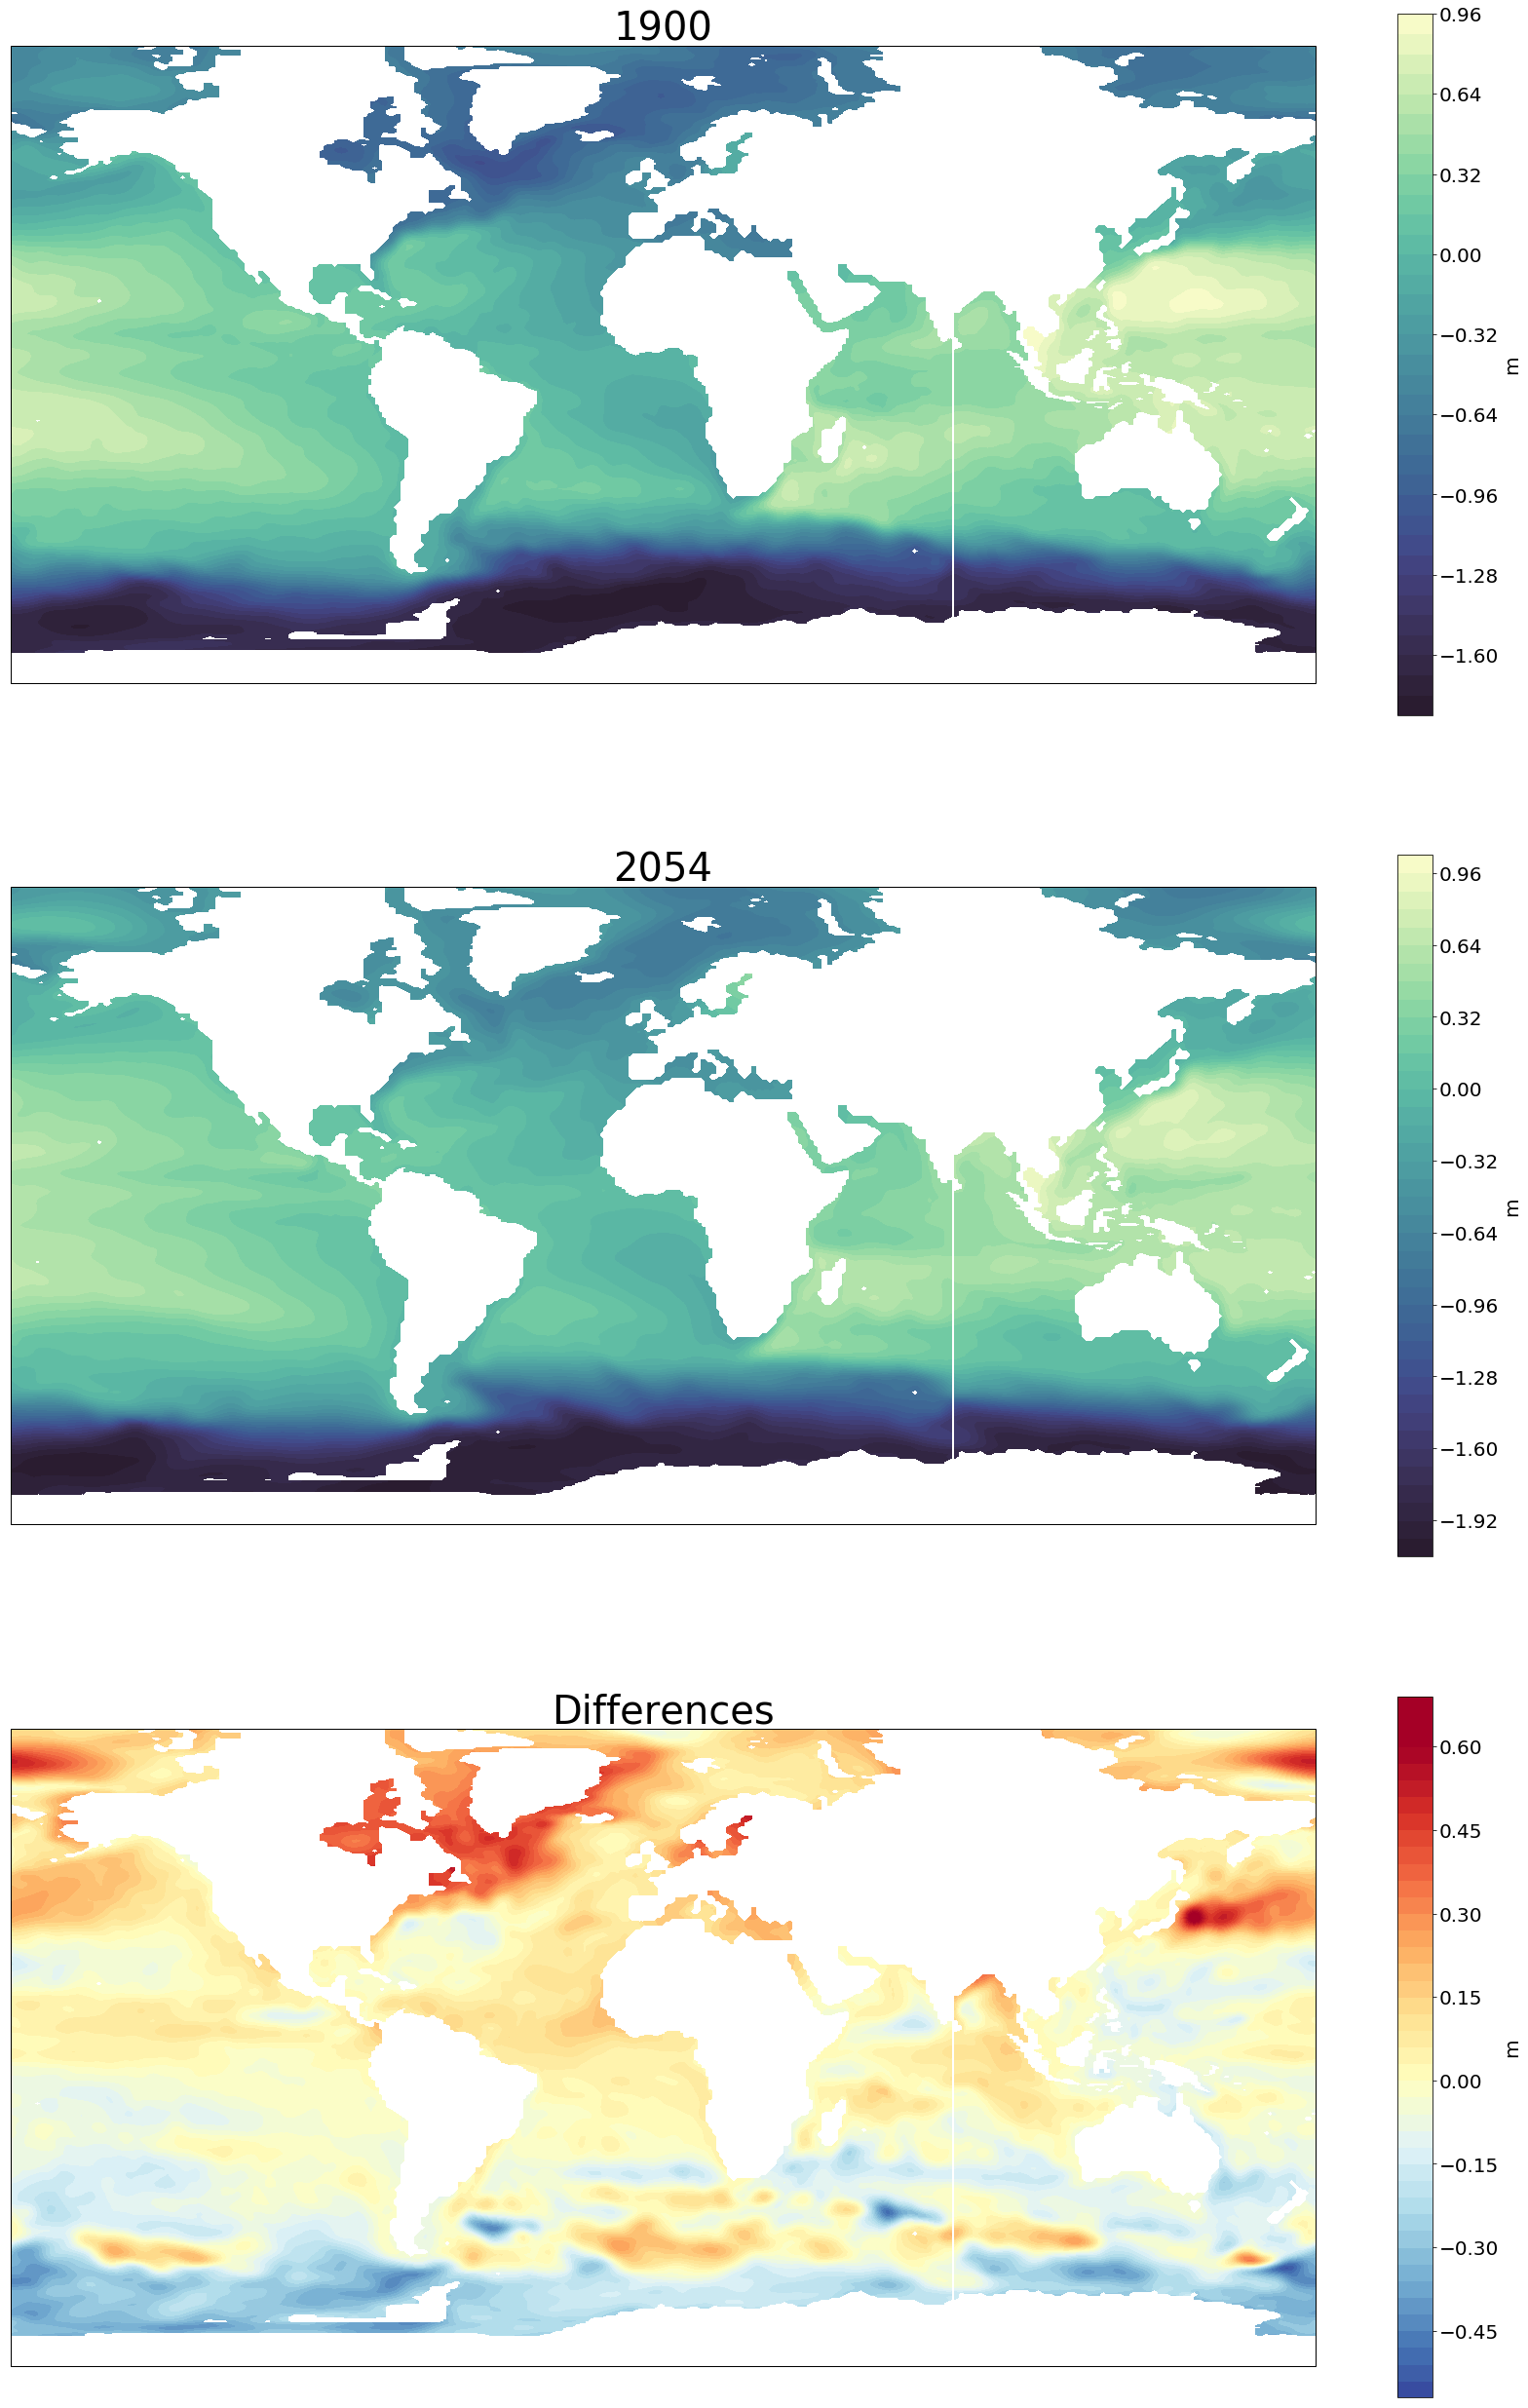

In [111]:
diferencia1D(dsm.sea_level, cmo.deep_r, -0.6, "m")

# MIXED-LAYER DEPTH

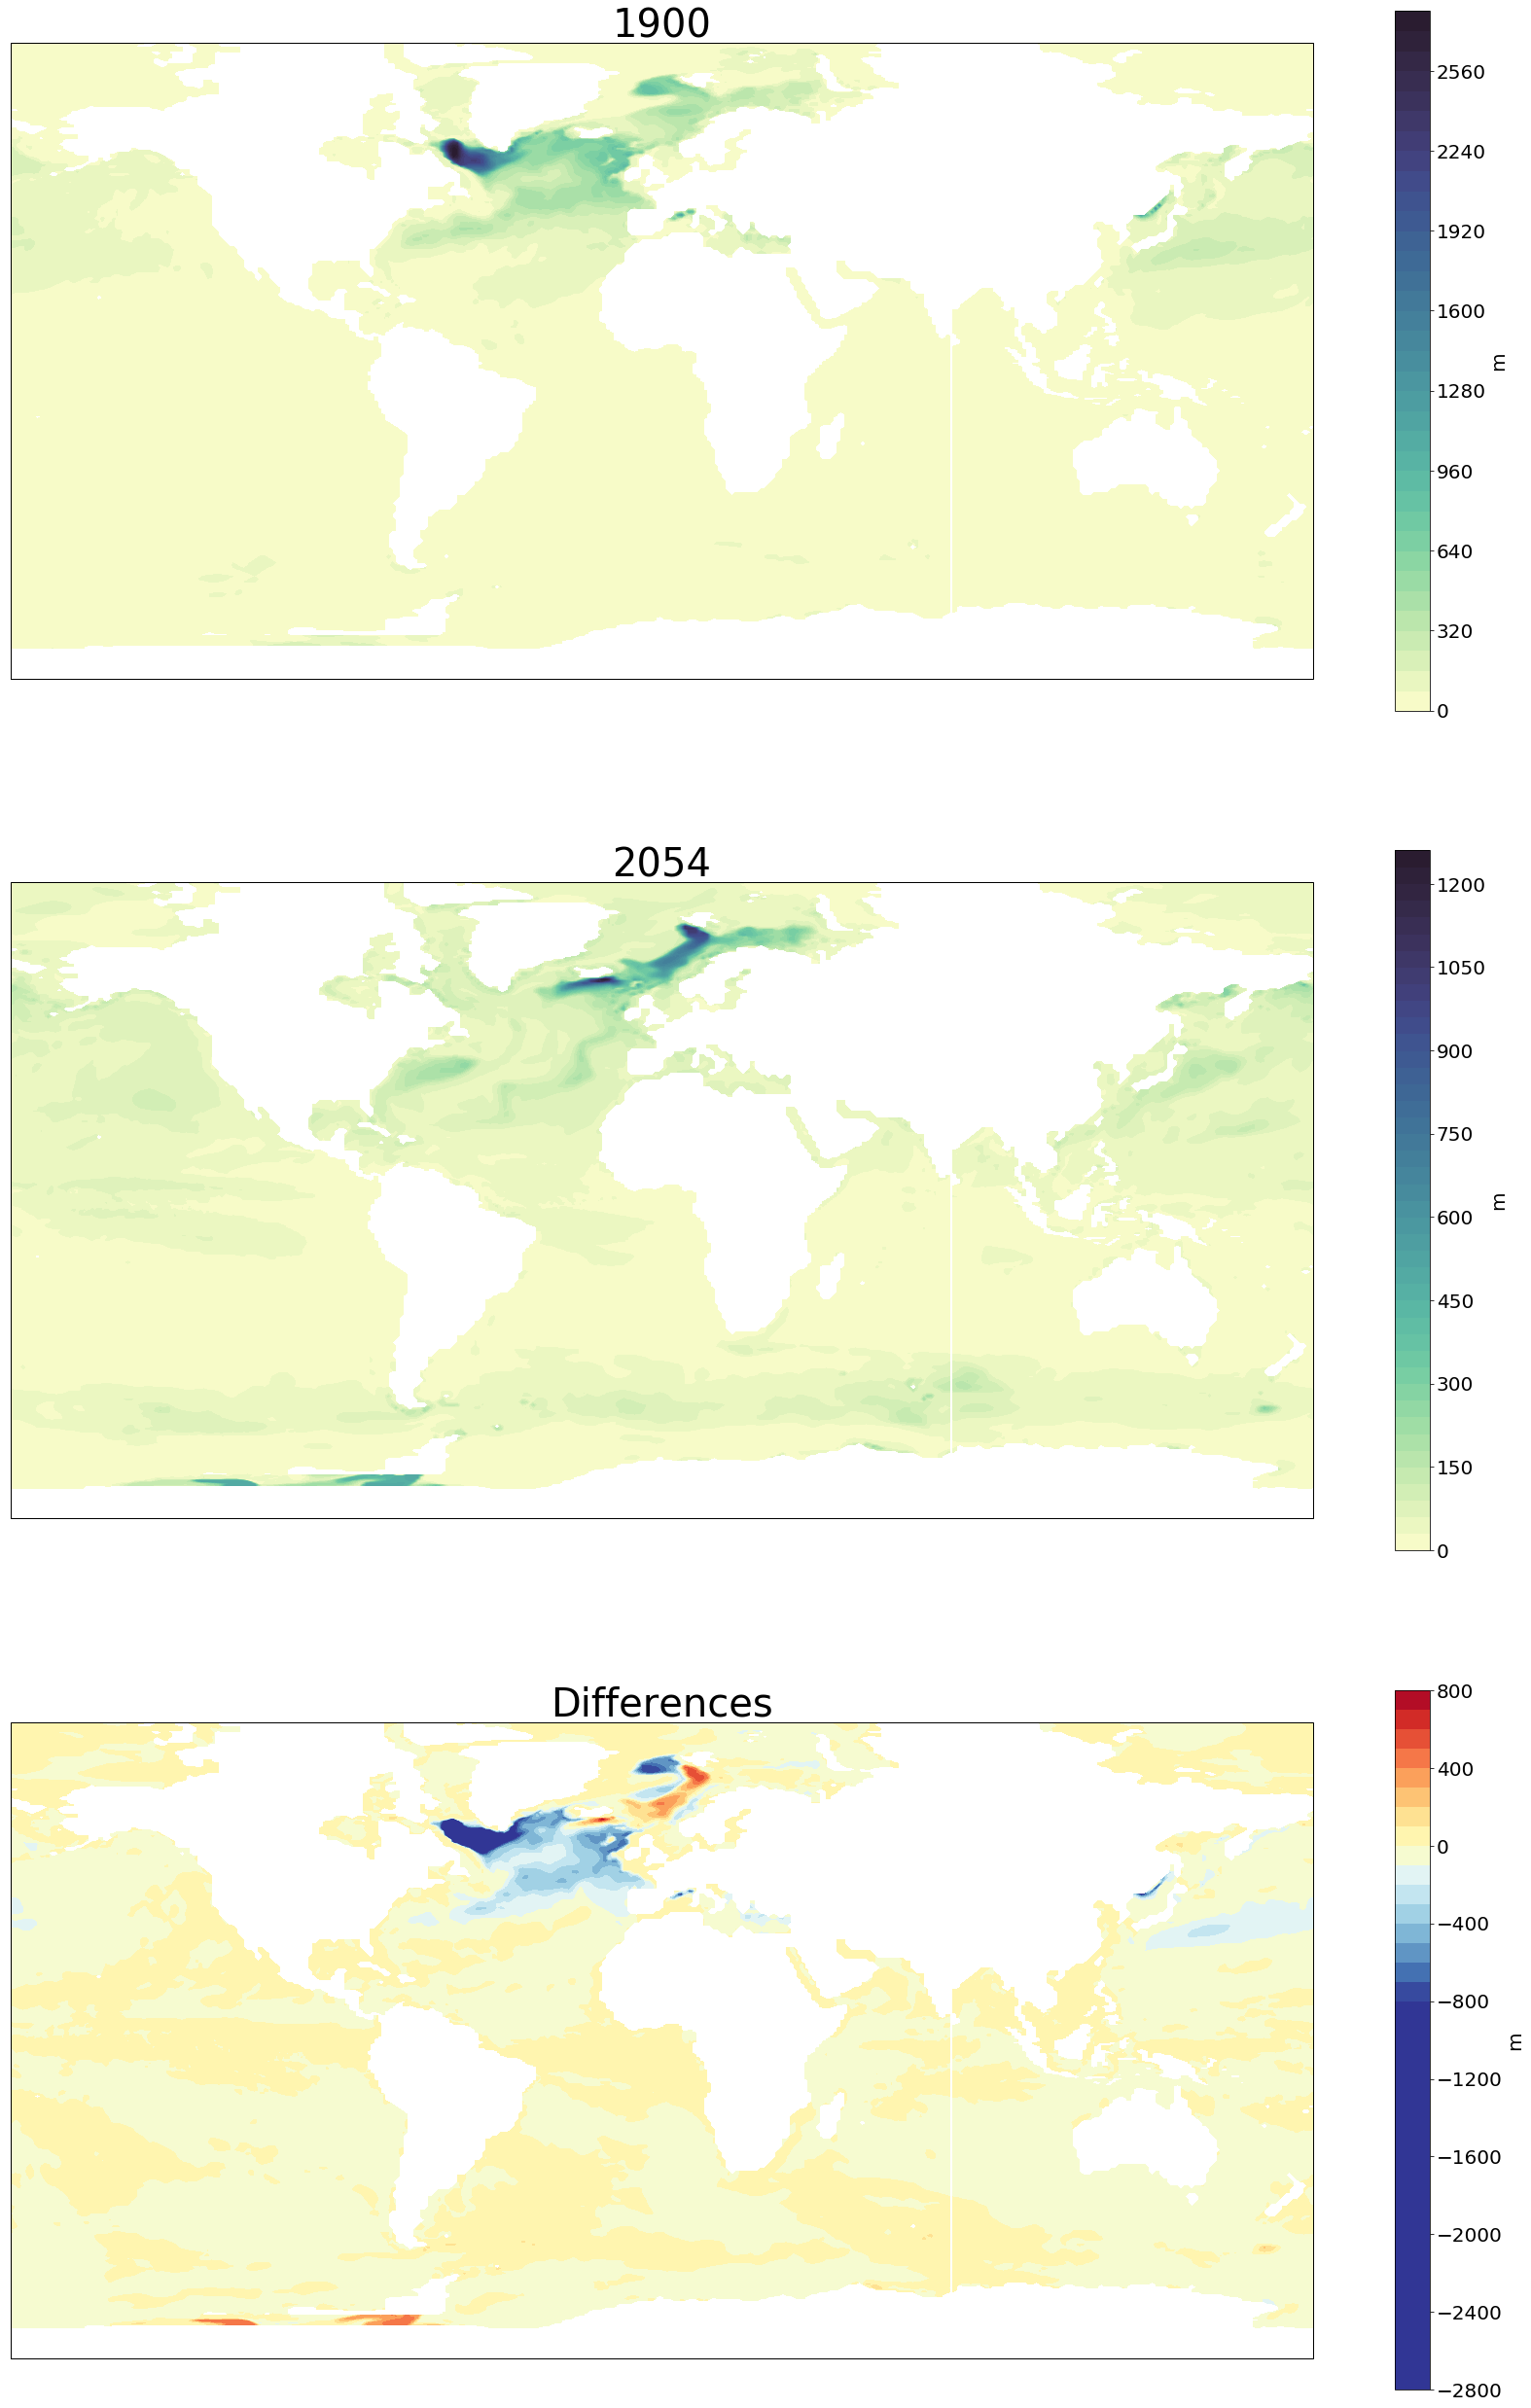

In [112]:
diferencia1D(dsm.mld, cmo.deep, -800, dsm.mld.units)

# SURFACE CURRENTS

In [66]:
!ncdump -h output000/ocean/ocean.nc

netcdf ocean {
dimensions:
	xt_ocean = 360 ;
	yt_ocean = 300 ;
	st_ocean = 50 ;
	st_edges_ocean = 51 ;
	time = UNLIMITED ; // (5 currently)
	nv = 2 ;
	xu_ocean = 360 ;
	yu_ocean = 300 ;
	sw_ocean = 50 ;
	sw_edges_ocean = 51 ;
	grid_xu_ocean = 360 ;
	grid_yt_ocean = 300 ;
	potrho = 80 ;
	potrho_edges = 81 ;
	grid_xt_ocean = 360 ;
	grid_yu_ocean = 300 ;
variables:
	double xt_ocean(xt_ocean) ;
		xt_ocean:long_name = "tcell longitude" ;
		xt_ocean:units = "degrees_E" ;
		xt_ocean:cartesian_axis = "X" ;
	double yt_ocean(yt_ocean) ;
		yt_ocean:long_name = "tcell latitude" ;
		yt_ocean:units = "degrees_N" ;
		yt_ocean:cartesian_axis = "Y" ;
	double st_ocean(st_ocean) ;
		st_ocean:long_name = "tcell zstar depth" ;
		st_ocean:units = "meters" ;
		st_ocean:cartesian_axis = "Z" ;
		st_ocean:positive = "down" ;
		st_ocean:edges = "st_edges_ocean" ;
	double st_edges_ocean(st_edges_ocean) ;
		st_edges_ocean:long_name = "tcell zstar depth edges" ;
		st_edges_ocean:units = "meters" ;
		st_edges_ocean:

In [274]:
dso

<xarray.Dataset>
Dimensions:          (grid_xt_ocean: 360, grid_xu_ocean: 360, grid_yt_ocean: 300, grid_yu_ocean: 300, nv: 2, potrho: 80, potrho_edges: 81, st_edges_ocean: 51, st_ocean: 50, sw_edges_ocean: 51, sw_ocean: 50, time: 155, xt_ocean: 360, xu_ocean: 360, yt_ocean: 300, yu_ocean: 300)
Coordinates:
  * potrho_edges     (potrho_edges) float64 1.028e+03 1.028e+03 ... 1.038e+03
  * xu_ocean         (xu_ocean) float64 -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * grid_xt_ocean    (grid_xt_ocean) float64 -279.5 -278.5 -277.5 ... 78.5 79.5
  * yt_ocean         (yt_ocean) float64 -77.88 -77.63 -77.38 ... 89.32 89.77
  * grid_yt_ocean    (grid_yt_ocean) float64 -77.88 -77.63 ... 89.32 89.77
  * sw_edges_ocean   (sw_edges_ocean) float64 1.055 3.552 ... 5.363e+03
  * yu_ocean         (yu_ocean) float64 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
  * grid_xu_ocean    (grid_xu_ocean) float64 -279.0 -278.0 -277.0 ... 79.0 80.0
  * st_ocean         (st_ocean) float64 1.152 3.649 ... 5.034e+03 5.2

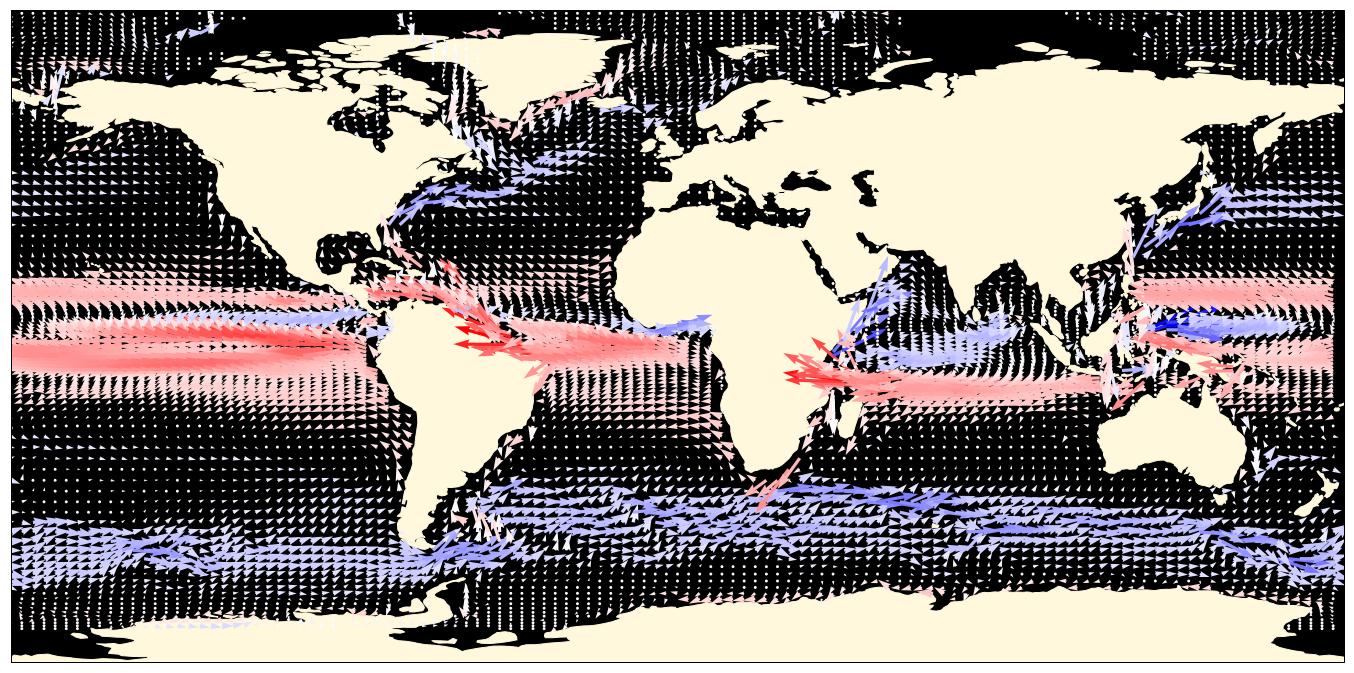

In [16]:
acc_u = dso.u[1,1]
acc_v = dso.v[1,1]

plt.figure(figsize=(30,12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.OCEAN, zorder=0, color="black")
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', color="Cornsilk")

magnitude = acc_u[::3, ::3]
ax.quiver(acc_u.xu_ocean[::3], acc_u.yu_ocean[::3], acc_u[::3, ::3], acc_v[::3, ::3], 
          magnitude,  scale=10, cmap='bwr_r')

plt.show()

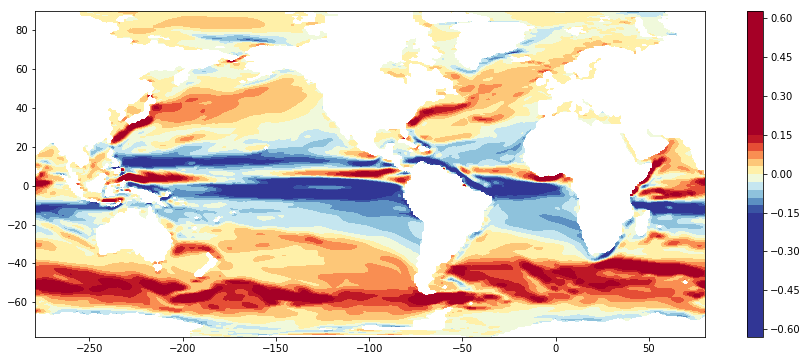

In [58]:
plt.figure(figsize=(15,6))
plt.contourf(dso.xu_ocean, dso.yu_ocean, dso.u[-1, 1], 40, cmap='RdYlBu_r', 
             vmin=-0.15, vmax=0.15)
plt.colorbar()
plt.show()

# ACC

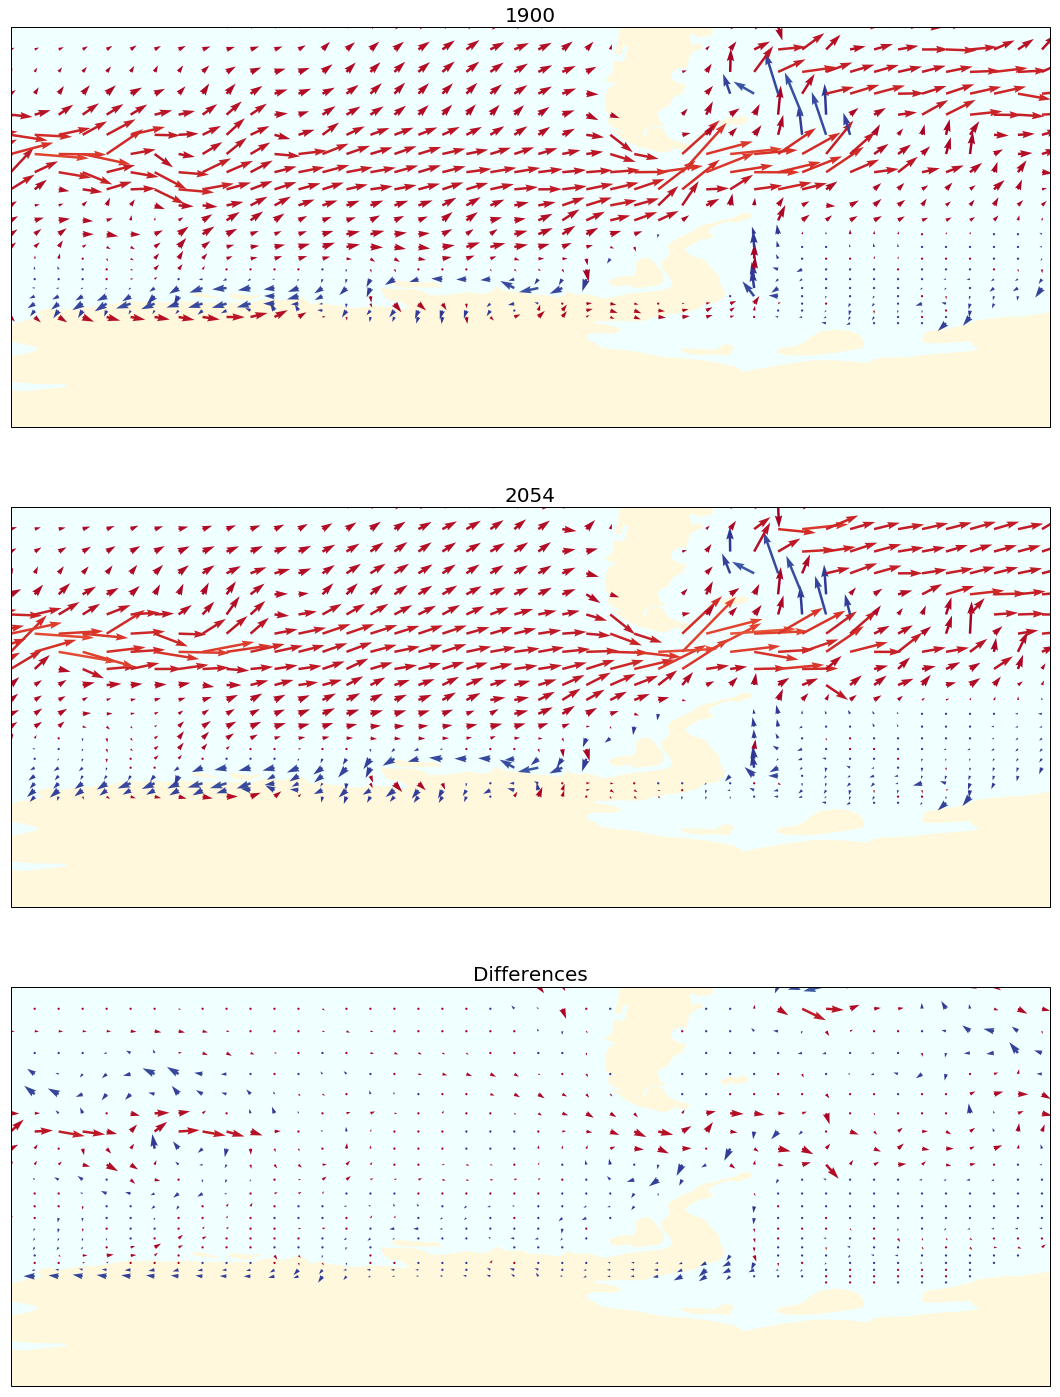

In [11]:
# ----- 1900
# Select 1st point in time, top layer of the ocean, first 70 latitudes, from 90–300 longitude
acc_u = dso.u[1,1]#,0:70,90:300]
acc_v = dso.v[1,1]#,0:70,90:300]

plt.figure(figsize=(30,25))
#plt.rcParams["font.family"] = "Helvetica"
#plt.rcParams["font.size"] = 20

ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
plt.title('1900', fontsize=20)
# Zoom in on the Antarctic Peninsula
ax1.set_extent([-150, -20, -90, -40])

ax1.add_feature(cartopy.feature.OCEAN, zorder=0, color='Azure')
ax1.add_feature(cartopy.feature.LAND, zorder=0, color='Cornsilk')

# Base the color of the arrows on the u-velocity (bipolar)
magnitude = acc_u[::3, ::3] % 2
ax1.quiver(acc_u.xu_ocean[::3], acc_u.yu_ocean[::3], acc_u[::3, ::3], acc_v[::3, ::3], 
          magnitude,  scale=5, cmap='RdYlBu')



# ----- 2054
acc_u = dso.u[-1,1]#,0:70,90:300]
acc_v = dso.v[-1,1]#,0:70,90:300]

ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
plt.title('2054', fontsize=20)
# Zoom in on the Antarctic Peninsula
ax2.set_extent([-150, -20, -90, -40])

ax2.add_feature(cartopy.feature.OCEAN, zorder=0, color='Azure')
ax2.add_feature(cartopy.feature.LAND, zorder=0, color='Cornsilk')

# Base the color of the arrows on the u-velocity (bipolar)
magnitude = acc_u[::3, ::3] % 2
ax2.quiver(acc_u.xu_ocean[::3], acc_u.yu_ocean[::3], acc_u[::3, ::3], acc_v[::3, ::3], 
          magnitude,  scale=5, cmap='RdYlBu')



# ----- Differences
acc_u = dso.u[-1,1] - dso.u[1,1]#,0:70,90:300]
acc_v = dso.v[-1,1] - dso.v[1,1]#,0:70,90:300]

ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
plt.title('Differences', fontsize=20)
# Zoom in on the Antarctic Peninsula
ax3.set_extent([-150, -20, -90, -40])

ax3.add_feature(cartopy.feature.OCEAN, zorder=0, color='Azure')
ax3.add_feature(cartopy.feature.LAND, zorder=0, color='Cornsilk')

# Base the color of the arrows on the u-velocity (bipolar)
magnitude = acc_u[::3, ::3] % 2
ax3.quiver(acc_u.xu_ocean[::3], acc_u.yu_ocean[::3], acc_u[::3, ::3], acc_v[::3, ::3], 
          magnitude,  scale=5, cmap='RdYlBu')

plt.show()

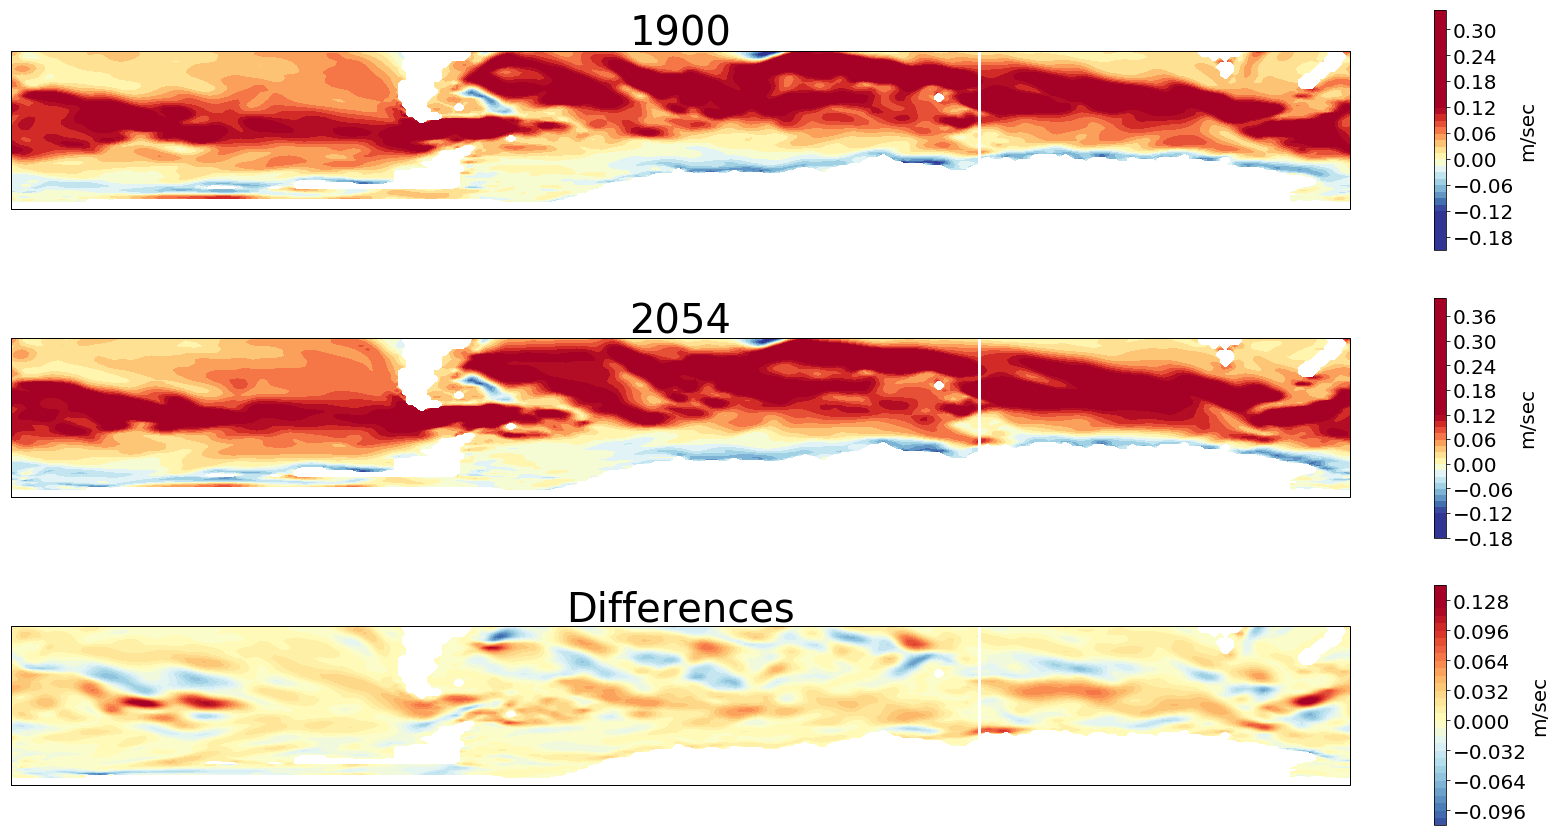

In [85]:
acc = dso.u[:,1,0:70,:]

plt.figure(figsize=(30,15))
ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
plot1 = ax1.contourf(acc.xu_ocean, acc.yu_ocean, acc[1], 40, cmap='RdYlBu_r', vmin=-0.12, vmax=0.12)
colorea(plot1, ax1, acc.units)
plt.title('1900', fontsize=40)

ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
plot2 = ax2.contourf(acc.xu_ocean, acc.yu_ocean, acc[-1], 40, cmap='RdYlBu_r', vmin=-0.12, vmax=0.12)
colorea(plot2, ax2, acc.units)
plt.title('2054', fontsize=40)

ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
plot3 = ax3.contourf(acc.xu_ocean, acc.yu_ocean, acc[-1] - acc[1], 40, cmap='RdYlBu_r', vmin=-0.12, vmax=0.12)
colorea(plot3, ax3, acc.units)
plt.title('Differences', fontsize=40)

plt.show()

# TEMPERATURE

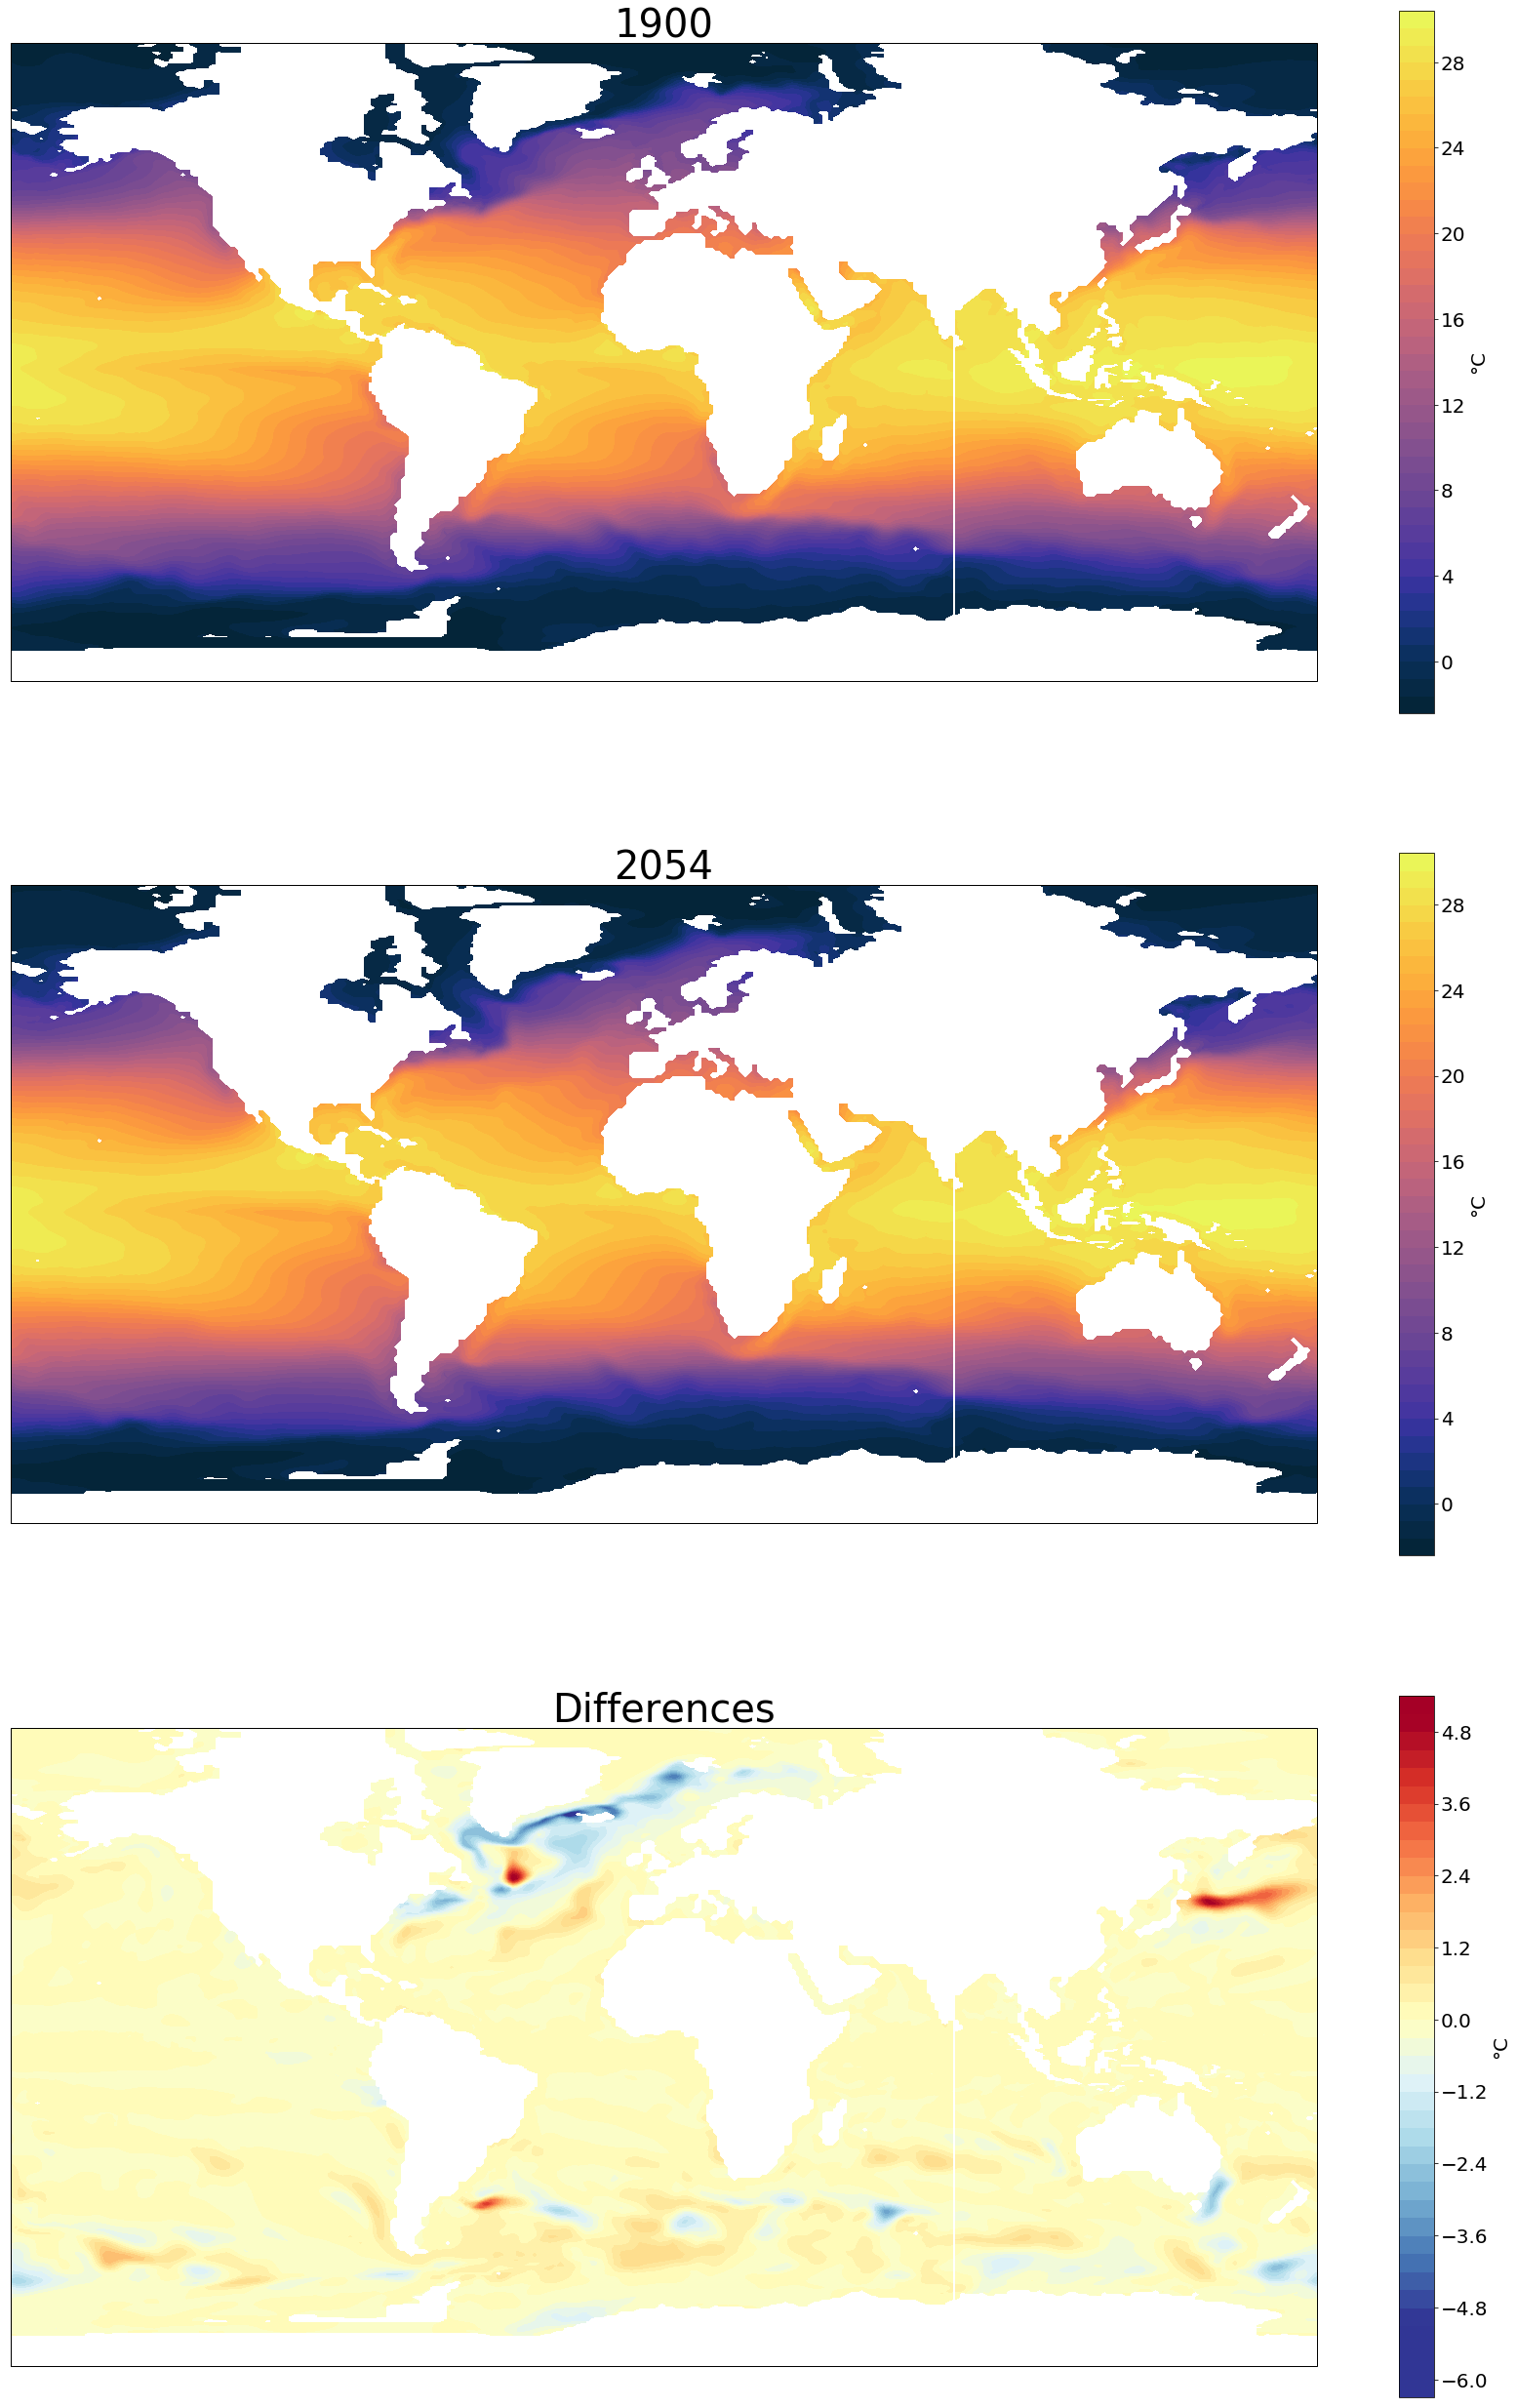

In [116]:
diferencia2D(dso.temp - 273.15, cmo.thermal, -5, "°C")

# SALT

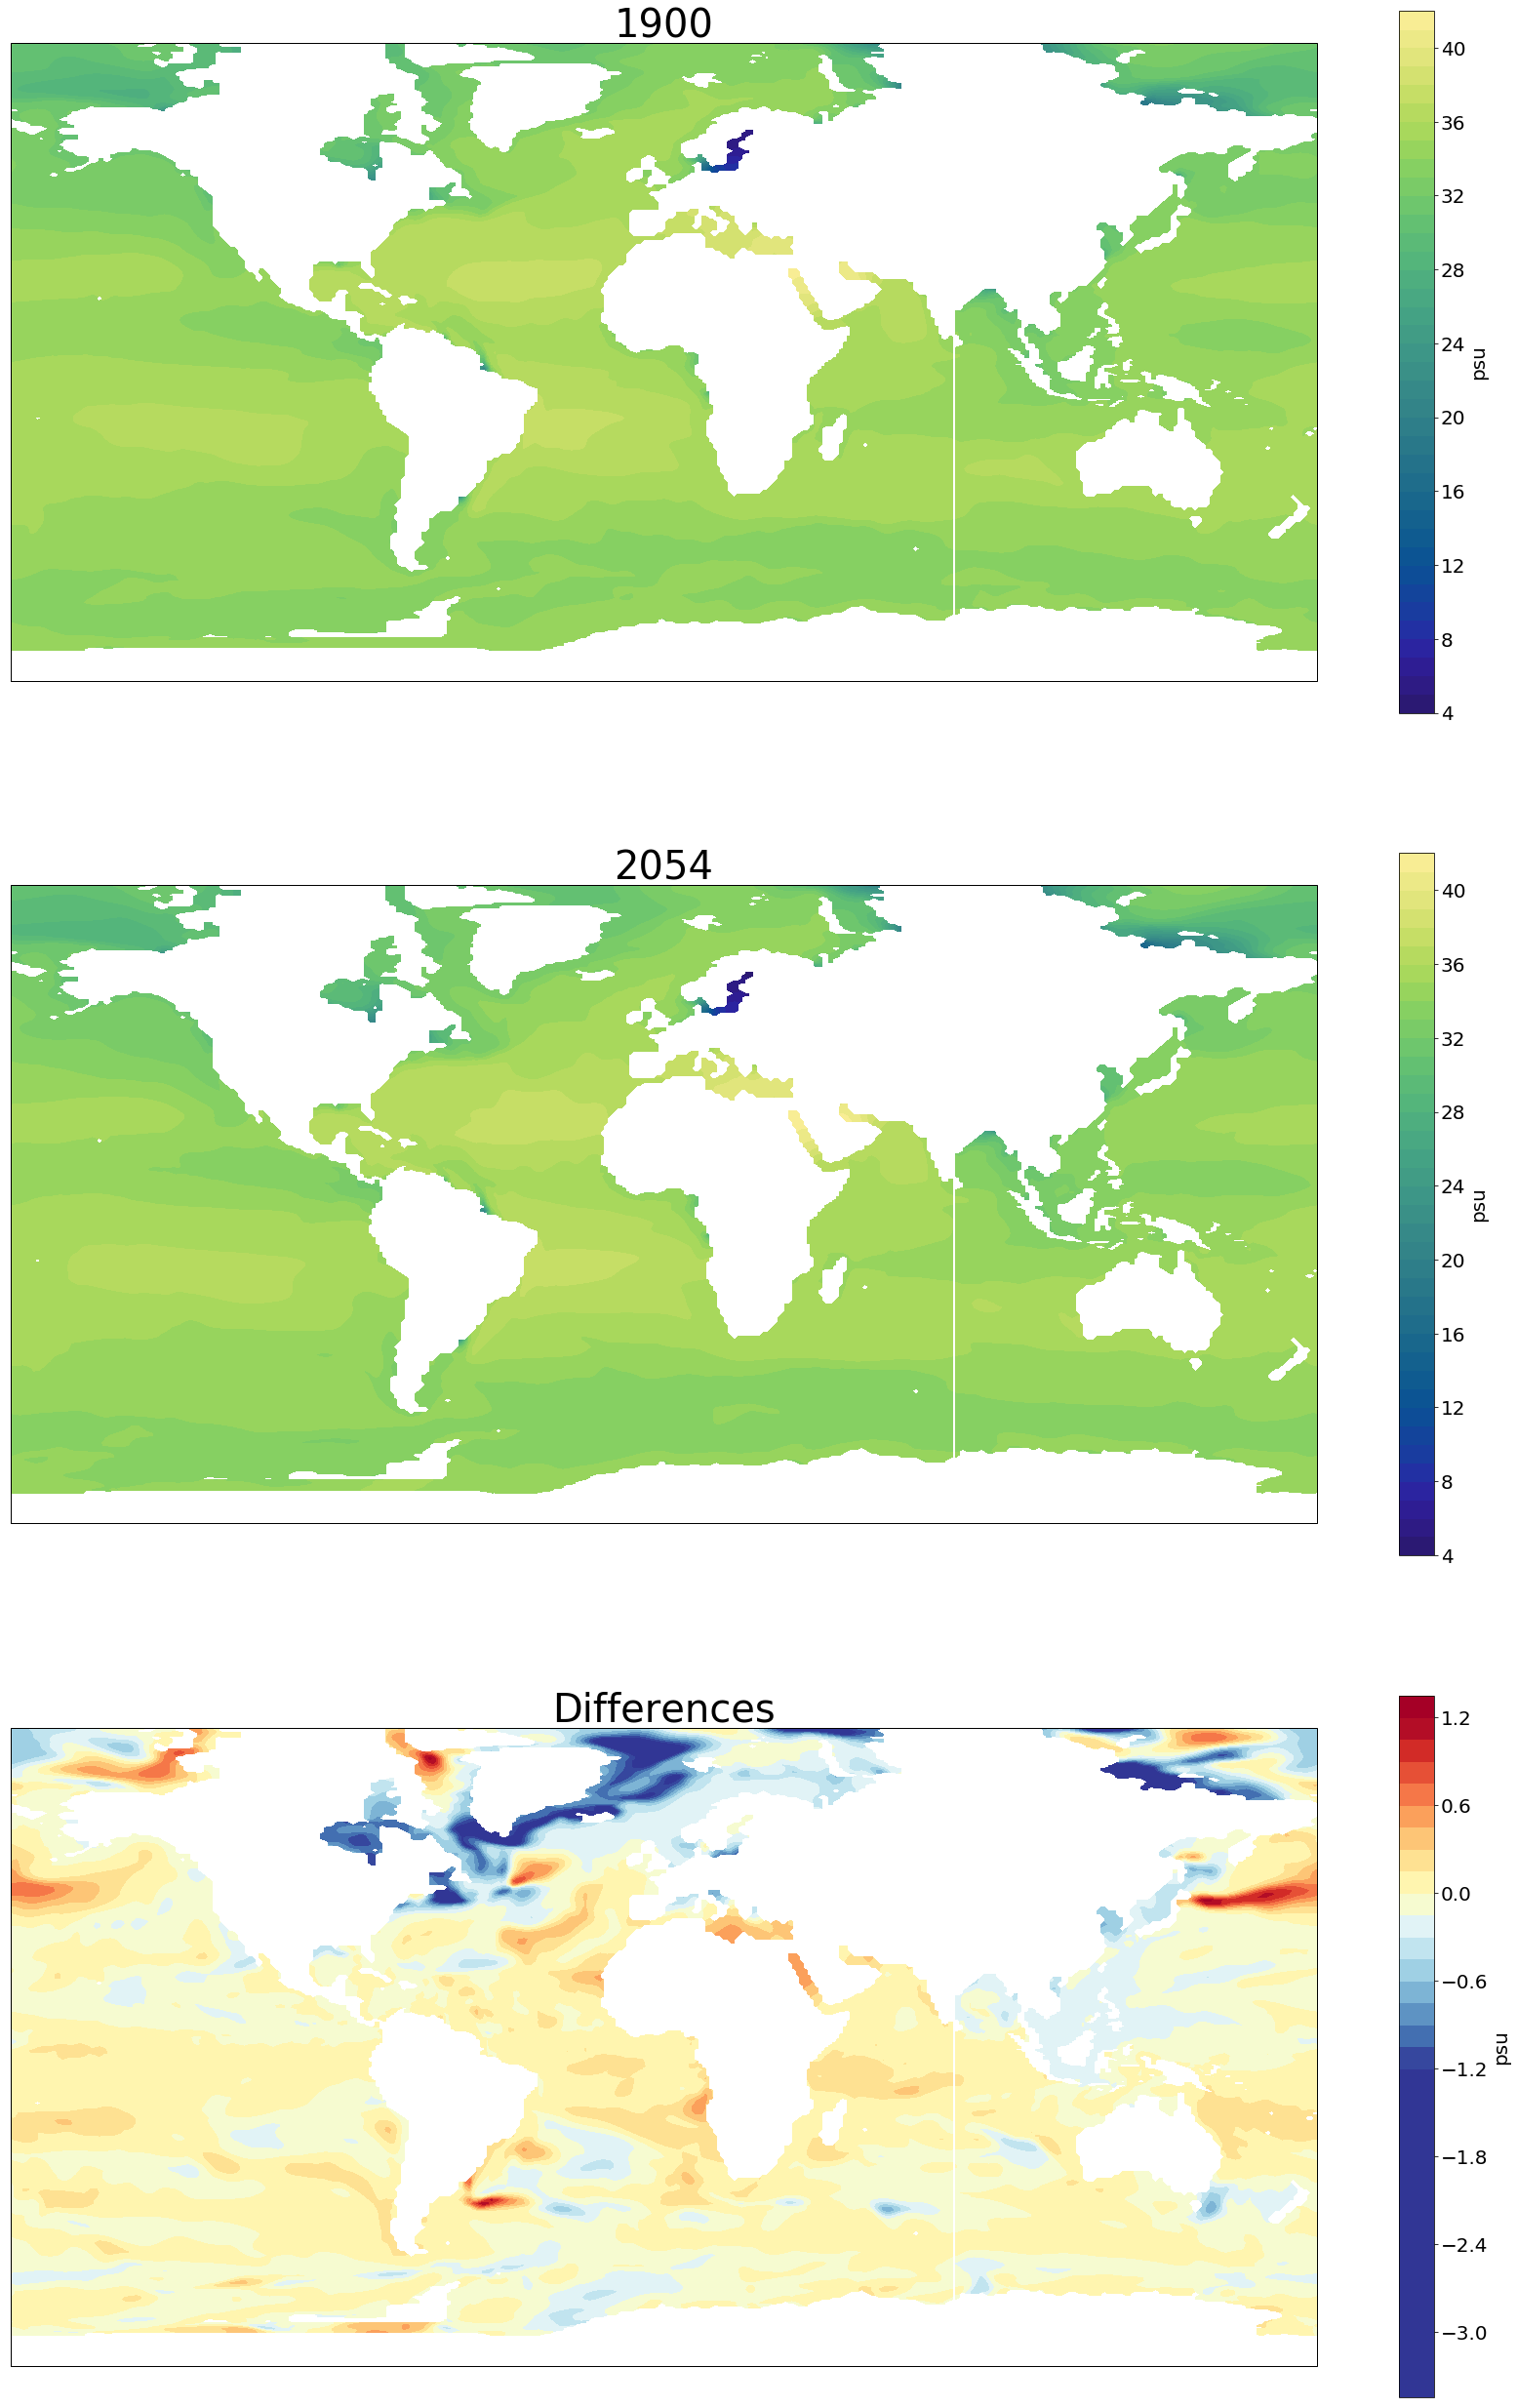

In [117]:
diferencia2D(dso.salt, cmo.haline, -1.2, dso.salt.units)

# DENSITY

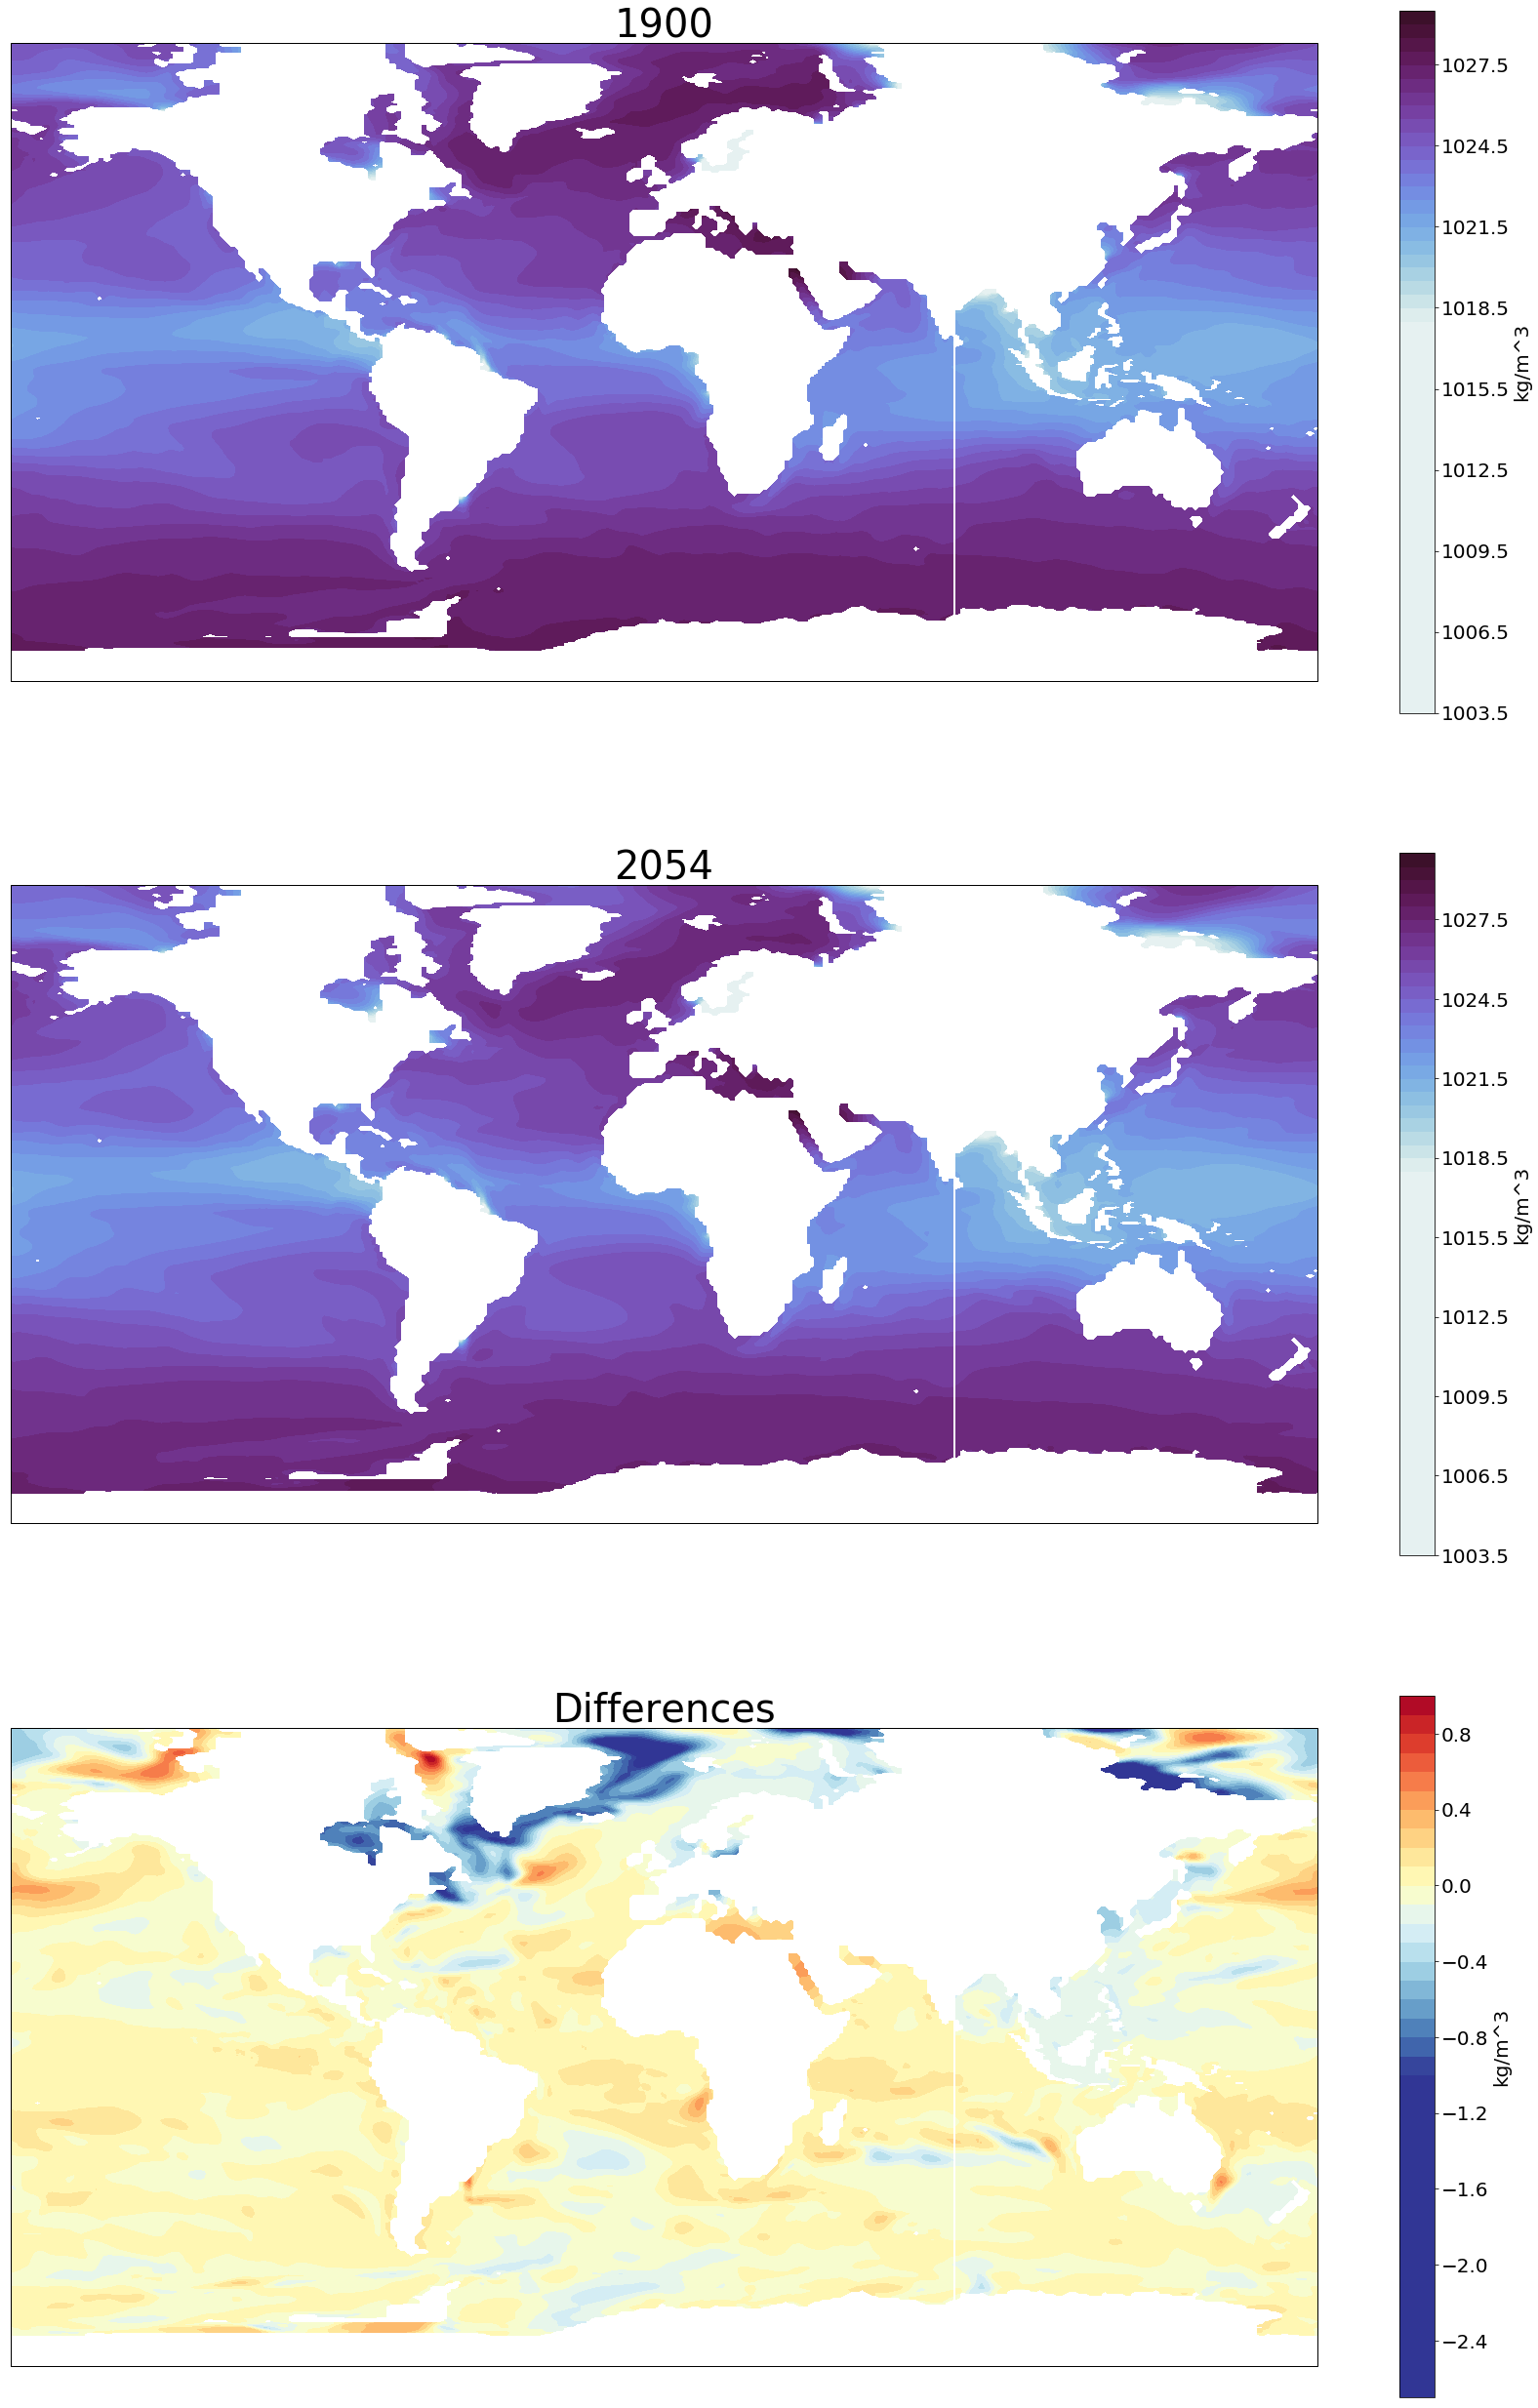

In [133]:
plt.figure(figsize=(30,45))
ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
plot1 = ax1.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_0[1, 1], 60, cmap=cmo.dense, vmin=1018)
colorea(plot1, ax1, dso.pot_rho_0.units)
plt.title('1900', fontsize=40)

ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
plot2 = ax2.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_0[-1, 1], 60, cmap=cmo.dense, vmin=1018)
colorea(plot2, ax2, dso.pot_rho_0.units)
plt.title('2054', fontsize=40)

ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
plot3 = ax3.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_0[-1, 1] - dso.pot_rho_0[1, 1], 40, cmap="RdYlBu_r",
                    vmin=-1, vmax=1)
colorea(plot3, ax3, dso.pot_rho_0.units)
plt.title('Differences', fontsize=40)

plt.show()

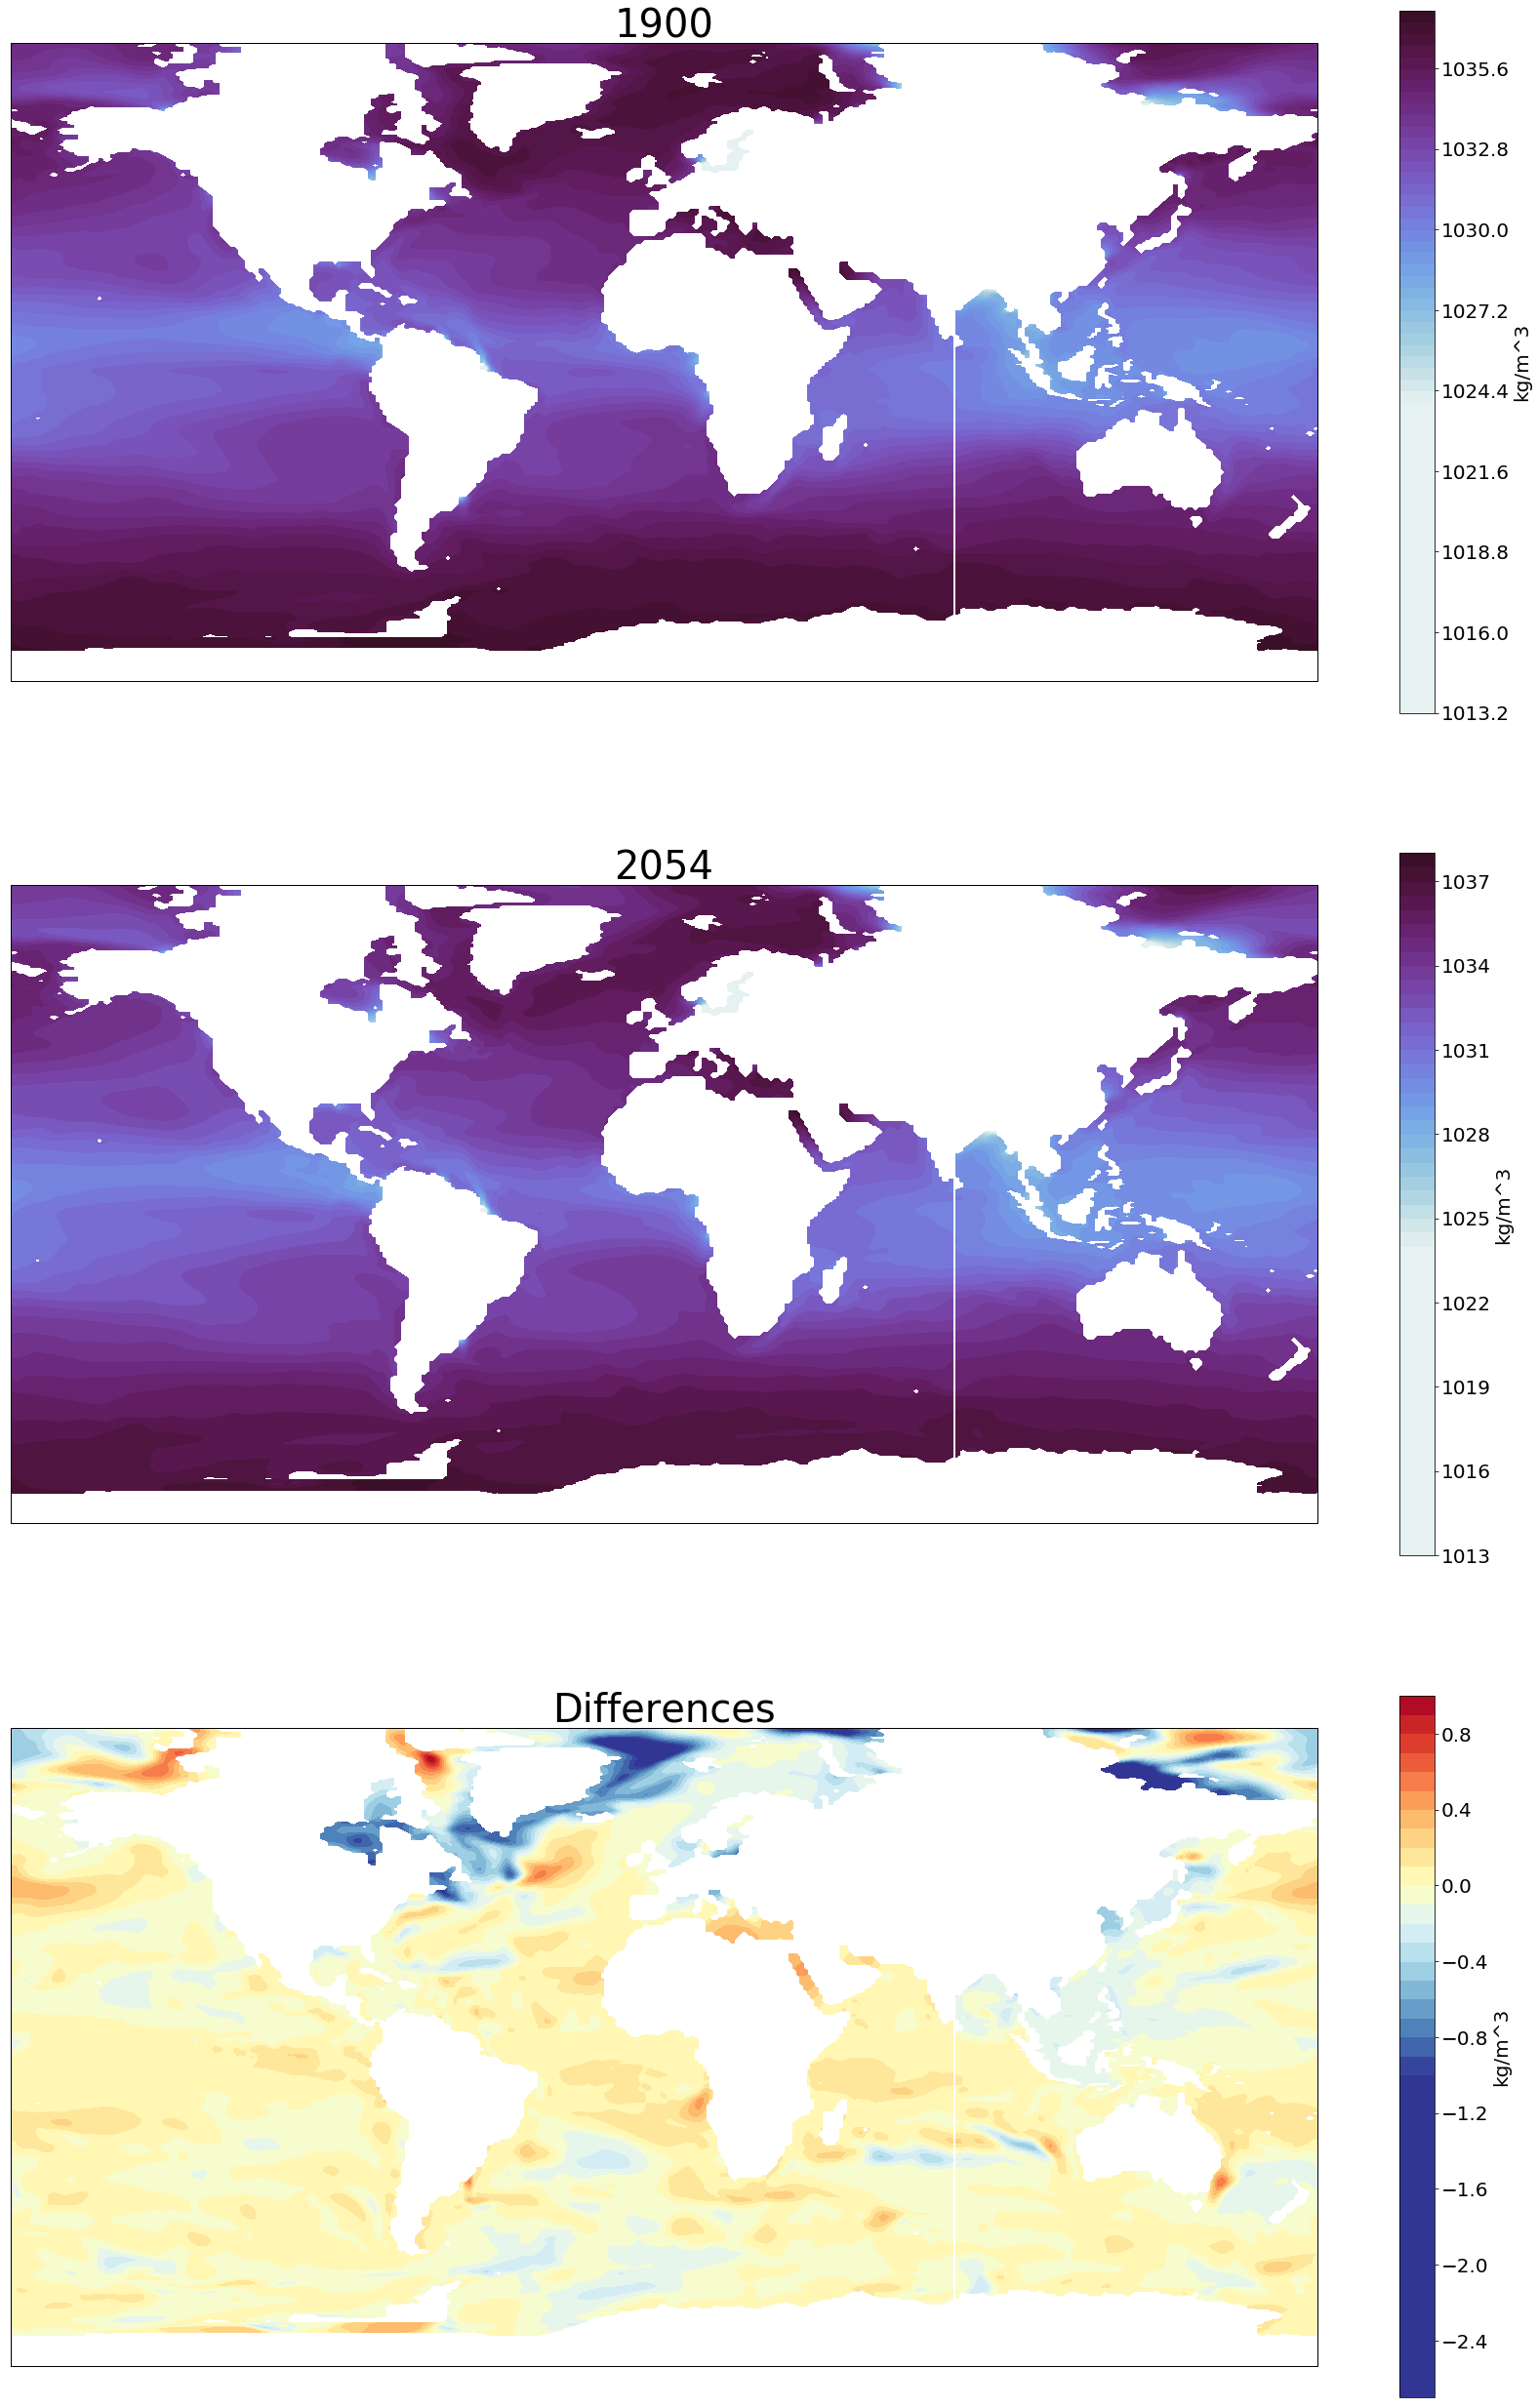

In [139]:
plt.figure(figsize=(30,45))
ax1 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
plot1 = ax1.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_2[1, 1], 60, cmap=cmo.dense, vmin=1024)
colorea(plot1, ax1, dso.pot_rho_2.units)
plt.title('1900', fontsize=40)

ax2 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
plot2 = ax2.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_2[-1, 1], 60, cmap=cmo.dense, vmin=1024)
colorea(plot2, ax2, dso.pot_rho_2.units)
plt.title('2054', fontsize=40)

ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
plot3 = ax3.contourf(dso.xt_ocean, dso.yt_ocean, dso.pot_rho_2[-1, 1] - dso.pot_rho_2[1, 1], 40, cmap="RdYlBu_r",
                    vmin=-1, vmax=1)
colorea(plot3, ax3, dso.pot_rho_2.units)
plt.title('Differences', fontsize=40)

plt.show()

# Look into /ocean to see what other .nc files exist